In [255]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline

# Read the data from the csv file into a pandas dataframe   
df = pd.read_csv('IMDB-Movie-Data.csv')
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
df.shape

(1000, 12)

In [256]:
df.shape

(1000, 12)

In [257]:
#what ar ethe column names in the dataset
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [258]:
df.head(12)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [260]:
# checking for duplicate values
print("checking for duplicate values : ",df.duplicated().any())

checking for duplicate values :  False


In [261]:
df['Revenue (Millions)'].isnull().sum()

128

In [262]:
df['Metascore'].isnull().sum()

64

In [263]:
df_rm_null= df.dropna()
df_rm_null.shape


(838, 12)

In [264]:
#rename the Runtime(Minutes) column to Runtime and Revenue(Millions) to Revenue
df_rm_null.rename(columns={'Runtime (Minutes)':'Runtime','Revenue (Millions)':'Revenue'},inplace=True)
df_rm_null.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [265]:
#sort the dataframe by revenue in descending order
df_rm_null.sort_values(by='Revenue',ascending=False,inplace=True)
df_rm_null.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
87,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
85,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
76,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
54,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


In [266]:
#update the index
df_rm_null.reset_index(drop=True,inplace=True)
df_rm_null.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
1,88,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
2,86,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
3,77,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
4,55,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


In [267]:
#reset the rank column
df_rm_null['Rank']=df_rm_null.index+1
df_rm_null.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
1,2,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
2,3,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
3,4,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
4,5,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


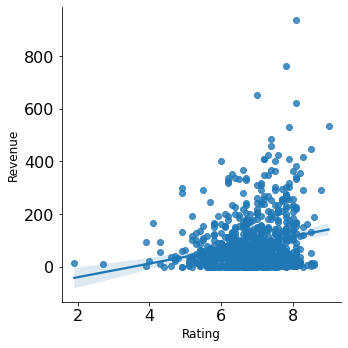

In [268]:
#plot the regression plot for rating vs revenue
sns.lmplot(x='Rating',y='Revenue',data=df_rm_null)
#we can see that the revenue is not normally distributed and there are some outliers in the data set as well 

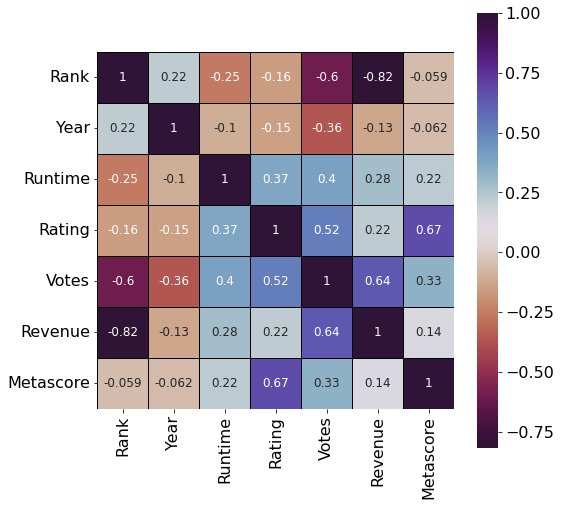

In [269]:
#plot a heatmap to see the correlation between the variables
#make text bigger
plt.rcParams['font.size'] = 12

plt.figure(figsize=(8,8))
sns.heatmap(df_rm_null.corr(method='pearson'),annot=True,linewidths=1,linecolor='black',square=True, cmap="twilight_shifted_r")

plt.show()

In [270]:
df_rm_null.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
1,2,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
2,3,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
3,4,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
4,5,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
5,6,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0
6,7,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0
7,8,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0
8,9,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0
9,10,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,7.6,525646,424.65,76.0


In [271]:
#top ten directors with the highest revenue and their average rating     
df_rm_null.groupby('Director')['Revenue','Rating'].mean().sort_values(by='Revenue',ascending=False).head(10)

C:\Users\User\AppData\Local\Temp/ipykernel_21336/4144839165.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rm_null.groupby('Director')['Revenue','Rating'].mean().sort_values(by='Revenue',ascending=False).head(10)


,Revenue,Rating
Director,,
James Cameron,760.510,7.80
Colin Trevorrow,652.180,7.00
Joss Whedon,541.135,7.75
Lee Unkrich,414.980,8.30
Gary Ross,408.000,7.20
Chris Buck,400.740,7.50
Chris Renaud,368.310,6.60
Gareth Edwards,366.415,7.15
Tim Miller,363.020,8.00


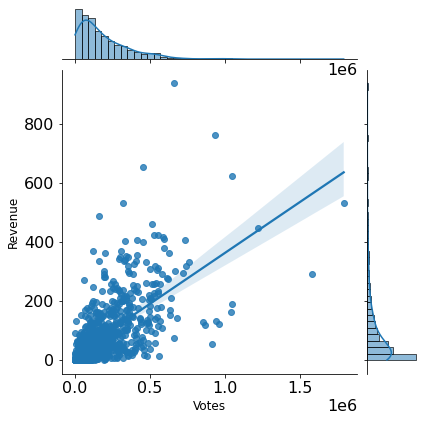

In [272]:
#plot the joint plot for votes vs revenue 
sns.jointplot(x='Votes',y='Revenue',data=df_rm_null,kind='reg')
plt.show()
#comments: we can see that the revenue is not normally distributed and there are some outliers in the data set as well 



In [273]:
#-------------------------------------------------Linear REGRESSION---------------------------------------------------------------------------------------------------------------


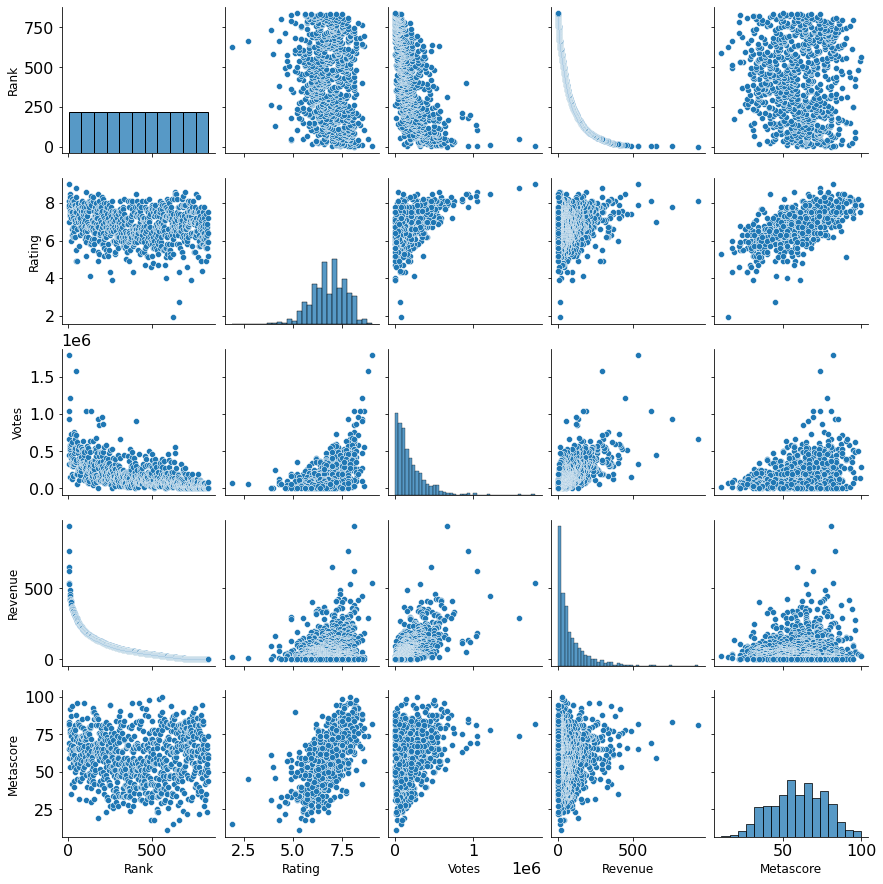

In [274]:
#plot pairwie plot for the data set with the regression line
sns.pairplot(df_rm_null.drop(['Year','Runtime'],axis=1))
plt.show()

In [275]:
#the averange revenue of each year
print(" The average revenue of each year is :")
df_rm_null.groupby('Year')['Revenue'].mean()

 The average revenue of each year is :


Year
2006     87.255610
2007     93.074091
2008     97.525417
2009    115.742000
2010    105.081579
2011     93.703333
2012    110.103065
2013     88.084643
2014     85.433656
2015     80.725596
2016     55.566111
Name: Revenue, dtype: float64

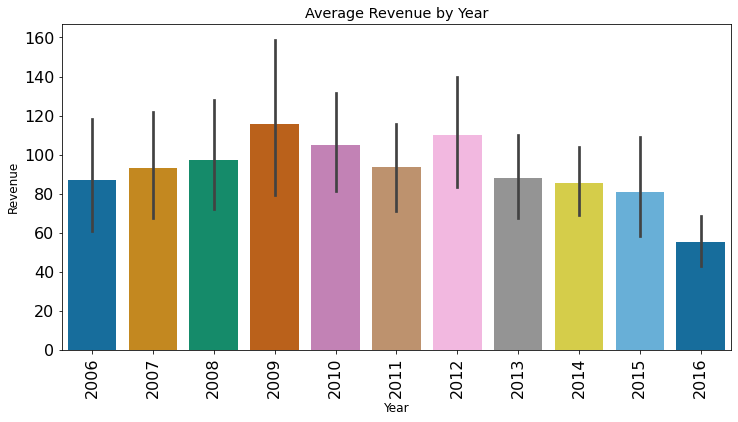

In [276]:
#plot the average revenue by each year
plt.figure(figsize=(12,6))
sns.barplot(x='Year',y='Revenue',data=df_rm_null, palette="colorblind")
plt.xticks(rotation=90)
plt.title('Average Revenue by Year')
plt.show()


In [277]:

print("Number of movies released each year :")
df_rm_null['Year'].value_counts()

Number of movies released each year :


2016    198
2015    109
2014     93
2013     84
2012     62
2010     57
2011     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

Text(0.5, 1.0, 'Number of movies released each year')

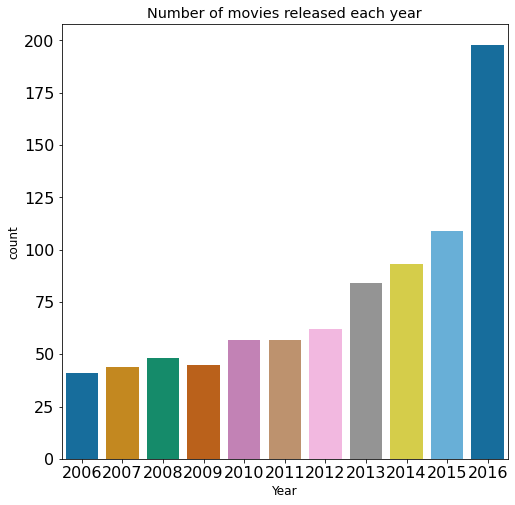

In [278]:
sns.countplot(x='Year',data=df_rm_null, palette="colorblind")
plt.title("Number of movies released each year")


Text(0.5, 1.0, 'Average Votes by Year')

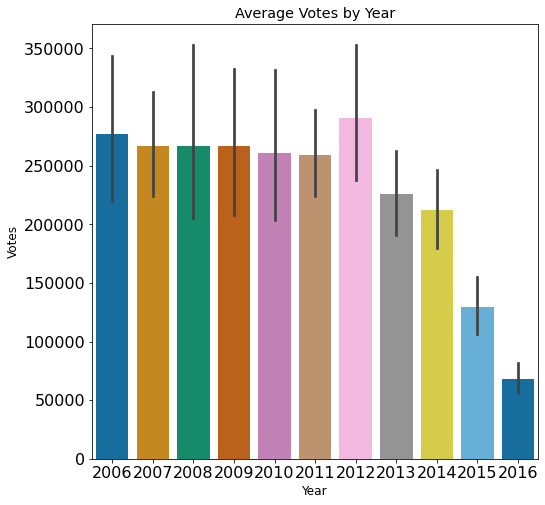

In [279]:
df_rm_null.groupby('Year')['Votes'].mean()
sns.barplot(x='Year',y='Votes',data=df_rm_null,palette="colorblind")
plt.title('Average Votes by Year')

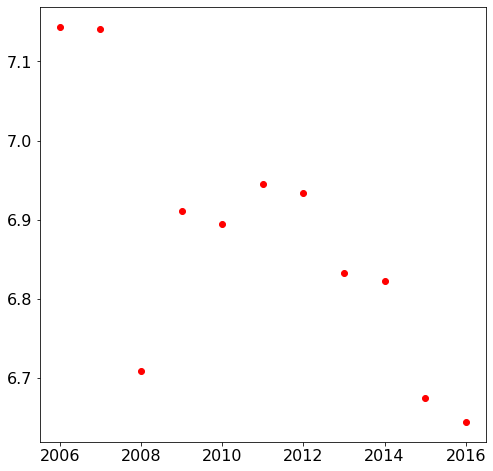

In [280]:
#Grouped movies by years, trying to see if the rating follows a pattern throughout the years, if the quality of the movies follow a trend.
years=df_rm_null.groupby("Year")["Rating"].mean().reset_index()
plt.scatter(years["Year"],years["Rating"],color="red")

In [281]:
#Count Number of Action Movies
len(df_rm_null[df_rm_null['Genre'].str.contains('Action',case=False)])

277

In [282]:
df_rm_null.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore
0,1,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0
1,2,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0
2,3,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0
3,4,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0
4,5,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


In [283]:
#Index( 'Votes', 'Revenue (Millions)', 'Metascore', 'Action', 'Adventure', 'Animation', 'Biography', 'Comedy','Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 
#'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',,'Western', 'rating_class', 'director_id', 'genre_id'],
   

In [284]:
#-------------------
#knn

In [285]:
print("The number of movies with rating greater than 7.5 is : ", len(df_rm_null[df_rm_null['Rating'] >= 7.5]))
print("The number of movies with rating less than 7.5 and greater than 5.0 is : ", len(df_rm_null[(df_rm_null['Rating'] < 7.5) & (df_rm_null['Rating'] > 5.0)]))
print("The number of movies with rating less than 5.0 is : ", len(df_rm_null[df_rm_null['Rating'] <= 5.0]))


The number of movies with rating greater than 7.5 is :  212
The number of movies with rating less than 7.5 and greater than 5.0 is :  603
The number of movies with rating less than 5.0 is :  23


In [286]:
#describe the distribution of rating
df_rm_null['Rating'].describe()



count    838.000000
mean       6.814320
std        0.877754
min        1.900000
25%        6.300000
50%        6.900000
75%        7.500000
max        9.000000
Name: Rating, dtype: float64

In [287]:

# create a new column called rating_class and assign the score to it based on the rating 
# if the rating is greater than 7.5 then the rating_class is 2, if the rating is less than 7.5 and greater than 5.0 then the rating_class is 1, if the rating is less than 5.0 then the rating_class is 0
#create a new colimn called rating_class
df_rm_null['Rating_class'] = 0

#assign the score to it based on the rating
df_rm_null.loc[df_rm_null['Rating'] >= 7.5, 'Rating_class'] = 2
df_rm_null.loc[(df_rm_null['Rating'] < 7.5) & (df_rm_null['Rating'] > 5.0), 'Rating_class'] = 1
df_rm_null.loc[df_rm_null['Rating'] <= 5.0, 'Rating_class'] = 0


In [288]:
df_rm_null.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class
0,1,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,2
1,2,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0,2
2,3,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0,1
3,4,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0,2
4,5,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,2
5,6,Rogue One,"Action,Adventure,Sci-Fi",The Rebel Alliance makes a risky move to steal...,Gareth Edwards,"Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",2016,133,7.9,323118,532.17,65.0,2
6,7,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97,7.4,157026,486.29,77.0,1
7,8,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141,7.4,516895,458.99,66.0,1
8,9,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,448.13,78.0,2
9,10,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146,7.6,525646,424.65,76.0,2


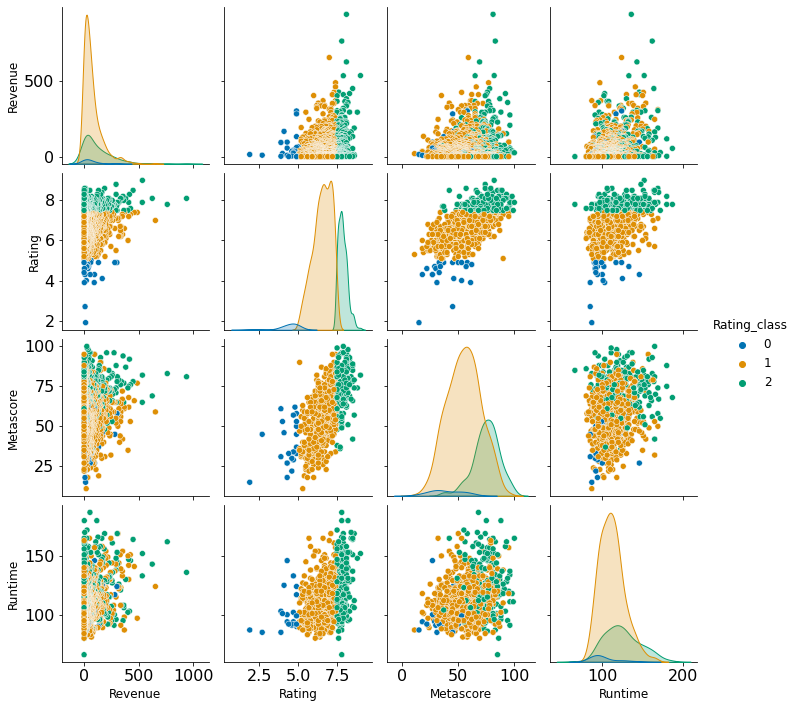

In [289]:
sns.pairplot(data=df_rm_null, vars=[ "Revenue","Rating", "Metascore", "Runtime"], hue="Rating_class", palette="colorblind")

In [290]:
#sepreate the data into features and labels 
df_labels = df_rm_null['Rating_class']
df_features = df_rm_null.drop(['Rating_class','Title','Genre','Year','Rating','Description','Actors','Rating','Director','Votes'],axis=1)

#df_labels = df_exp_rm_null['rating_class']
#df_features = df_exp_rm_null.drop(['rating_class','Title','Genre','Year','Rating','Description','Actors','Votes','Rating','Director'],axis=1)
                                  


In [291]:
df_features.head(15)

,Rank,Runtime,Revenue,Metascore
0,1,136,936.63,81.0
1,2,162,760.51,83.0
2,3,124,652.18,59.0
3,4,143,623.28,69.0
4,5,152,533.32,82.0
5,6,133,532.17,65.0
6,7,97,486.29,77.0
7,8,141,458.99,66.0
8,9,164,448.13,78.0
9,10,146,424.65,76.0


In [292]:
standardiser = StandardScaler()
df_features_standardised = standardiser.fit_transform(df_features) 

In [293]:
df_features_standardised_train, df_features_standardised_test, df_labels_train, df_labels_test = train_test_split(df_features_standardised, df_labels, test_size=0.2)

In [294]:
knn = KNeighborsClassifier()
knn.fit(df_features_standardised_train, df_labels_train)

KNeighborsClassifier()

In [295]:
pred_df =pd.DataFrame({'Predicted':knn.predict(df_features_standardised_test),'Actual':df_labels_test})
pred_df

,Predicted,Actual
388,1,1
282,1,1
50,1,0
631,1,2
295,1,1
...,...,...
130,1,1
434,1,1
413,1,1
261,1,2


In [296]:
print("The accuracy of the model is : ", knn.score(df_features_standardised_test, df_labels_test))

The accuracy of the model is :  0.8095238095238095


In [297]:
#accuracy by coding the model from scratch 
np.sum(pred_df['Predicted'] == pred_df['Actual'])/len(pred_df)

0.8095238095238095

In [298]:
#accuracy by using the sklearn library
metrics.accuracy_score(df_labels_test, knn.predict(df_features_standardised_test))



0.8095238095238095

Text(0.5, 1.0, 'Accuracy by k')

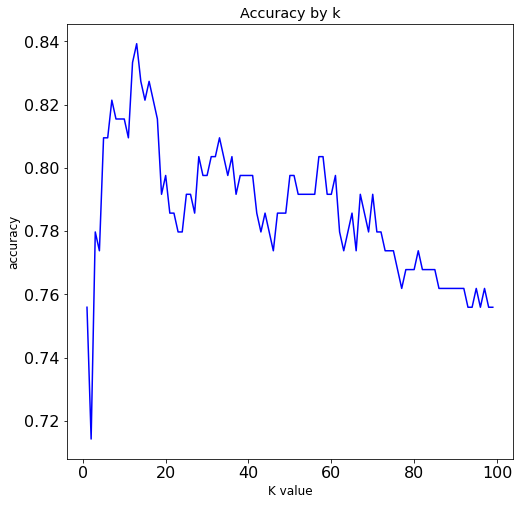

In [299]:
#Run _k_-NN 100 times each time with a different $k$. Predict the classes of your test set, and compute the accuracy of each model. Plot the accuracy as a function of $k$.

accuracy = []
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_features_standardised_train, df_labels_train)
    df_exp_rm_null_predict = knn.predict(df_features_standardised_test)
    accuracy.append(metrics.accuracy_score(df_labels_test, df_exp_rm_null_predict))

plt.plot(range(1, 100), accuracy, color = 'blue')
plt.xlabel('K value')
plt.ylabel('accuracy')
plt.title('Accuracy by k')


The best model is :  9


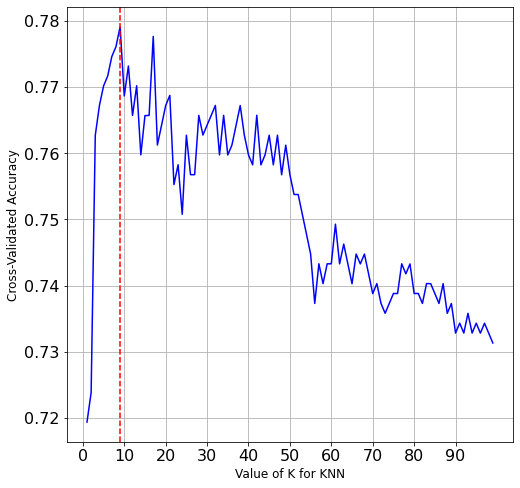

In [300]:
#run a cross validation on the training data set with 4 folds, compute the mean ofthe accurasy of each fold, plot the mean accuracy of each model and choose the best model
k_range = range(1, 100)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, df_features_standardised_train, df_labels_train, cv=4, scoring='accuracy')
    k_scores.append(scores.mean())
#add more xticks
plt.xticks(np.arange(0, 100, 10))
plt.plot(k_range, k_scores, color='blue')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
#what is the best model
print("The best model is : ", k_scores.index(max(k_scores))+1)
plt.axvline(x=k_scores.index(max(k_scores))+1, color='red', linestyle='--')







In [301]:
#what is the best model 
k_scores.index(max(k_scores))


8

In [302]:
#We use dummy variables when applying regression and classification algorithms to categorical data.
genre_expanded = df_rm_null['Genre'].str.get_dummies(sep=',')
df_rm_null_genres = pd.concat([df_rm_null, genre_expanded], axis=1)
df_rm_null_genres.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,...,0,0,0,0,0,0,0,0,0,0
1,2,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,...,0,0,0,0,0,0,0,0,0,0
2,3,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,...,0,0,0,0,0,1,0,0,0,0
3,4,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,...,0,0,0,0,0,1,0,0,0,0
4,5,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,...,0,0,0,0,0,0,0,0,0,0


In [303]:
#show the thriller movies
df_rm_null_genres[df_rm_null_genres['Thriller'] == 1].head(10)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
8,9,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164,8.5,1222645,...,0,0,0,0,0,0,0,1,0,0
14,15,The Hunger Games,"Adventure,Sci-Fi,Thriller",Katniss Everdeen voluntarily takes her younger...,Gary Ross,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2012,142,7.2,735604,...,0,0,0,0,0,1,0,1,0,0
25,26,Furious Seven,"Action,Crime,Thriller",Deckard Shaw seeks revenge against Dominic Tor...,James Wan,"Vin Diesel, Paul Walker, Dwayne Johnson, Jason...",2015,137,7.2,301249,...,0,0,0,0,0,0,0,1,0,0
39,40,Skyfall,"Action,Adventure,Thriller",Bond's loyalty to M is tested when her past co...,Sam Mendes,"Daniel Craig, Javier Bardem, Naomie Harris, Ju...",2012,143,7.8,547386,...,0,0,0,0,0,0,0,1,0,0
52,53,Gravity,"Drama,Sci-Fi,Thriller",Two astronauts work together to survive after ...,Alfonso Cuarón,"Sandra Bullock, George Clooney, Ed Harris, Ort...",2013,91,7.8,622089,...,0,0,0,0,0,1,0,1,0,0
69,70,Furious 6,"Action,Crime,Thriller",Hobbs has Dominic and Brian reassemble their c...,Justin Lin,"Vin Diesel, Paul Walker, Dwayne Johnson, Miche...",2013,130,7.1,318051,...,0,0,0,0,0,0,0,1,0,0
79,80,The Bourne Ultimatum,"Action,Mystery,Thriller",Jason Bourne dodges a ruthless CIA official an...,Paul Greengrass,"Matt Damon, Edgar Ramírez, Joan Allen, Julia S...",2007,115,8.1,525700,...,0,0,0,1,0,0,0,1,0,0
82,83,The Da Vinci Code,"Mystery,Thriller",A murder inside the Louvre and clues in Da Vin...,Ron Howard,"Tom Hanks, Audrey Tautou, Jean Reno, Ian McKellen",2006,149,6.6,338280,...,0,0,0,1,0,0,0,1,0,0
86,87,Fast Five,"Action,Crime,Thriller",Dominic Toretto and his crew of street racers ...,Justin Lin,"Vin Diesel, Paul Walker, Dwayne Johnson, Jorda...",2011,131,7.3,300803,...,0,0,0,0,0,0,0,1,0,0
87,88,Mission: Impossible - Ghost Protocol,"Action,Adventure,Thriller",The IMF is shut down when it's implicated in t...,Brad Bird,"Tom Cruise, Jeremy Renner, Simon Pegg, Paula P...",2011,132,7.4,382459,...,0,0,0,0,0,0,0,1,0,0


In [304]:
genre = df_rm_null['Genre'].str.get_dummies(sep=',')
genre_count = genre.sum().sort_values(ascending=False)
print(genre_count)



Drama        419
Action       277
Comedy       250
Adventure    244
Thriller     148
Crime        126
Romance      120
Sci-Fi       107
Fantasy       92
Horror        87
Mystery       86
Biography     67
Family        48
Animation     45
History       25
Music         15
Sport         15
War           10
Musical        5
Western        4
dtype: int64


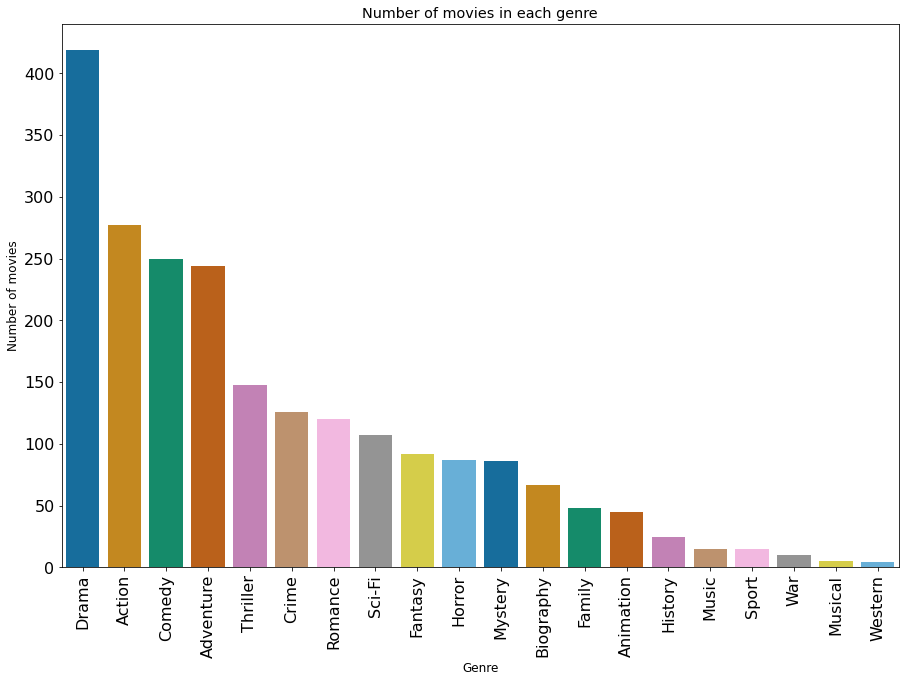

In [305]:
#create a plot to show the number of movies in each genre
plt.figure(figsize=(15,10))
sns.barplot(x=genre_count.index, y=genre_count.values, palette='colorblind')
plt.title('Number of movies in each genre')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.xticks(rotation=90)
plt.show()






In [306]:
#replace the sci-fi with sci_fi
df_rm_null_genres.rename(columns={'Sci-Fi':'SciFi'}, inplace=True)
df_rm_null_genres.head()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,...,Horror,Music,Musical,Mystery,Romance,SciFi,Sport,Thriller,War,Western
0,1,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,...,0,0,0,0,0,0,0,0,0,0
1,2,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,...,0,0,0,0,0,0,0,0,0,0
2,3,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,...,0,0,0,0,0,1,0,0,0,0
3,4,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,...,0,0,0,0,0,1,0,0,0,0
4,5,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,...,0,0,0,0,0,0,0,0,0,0


In [307]:
df_rm_null.rename(columns={'Runtime (Minutes)':'Runtime'}, inplace=True)


In [308]:
df_rm_null_genres.rename(columns={'Runtime (Minutes)':'Runtime'}, inplace=True)

In [309]:
#rename Revenue (Millions) to Revenue
df_rm_null.rename(columns={'Revenue (Millions)':'Revenue'}, inplace=True)
df_rm_null.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class
0,1,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,2
1,2,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0,2
2,3,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0,1
3,4,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0,2
4,5,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,2


In [310]:
df_rm_null_genres.rename(columns={'Revenue (Millions)':'Revenue'}, inplace=True)

In [311]:
import statsmodels.formula.api as smf
model1 = smf.ols(formula='Revenue ~ Action + Adventure + Animation + Biography + Comedy +Crime + Drama + Fantasy + Horror + Mystery + Romance + SciFi + Thriller + Western', data=df_rm_null_genres).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     23.64
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.64e-51
Time:                        03:50:11   Log-Likelihood:                -4943.1
No. Observations:                 838   AIC:                             9916.
Df Residuals:                     823   BIC:                             9987.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     75.2649     13.052      5.767      0.000      49.646     100.884
Action        17.5387      8.461      2.073      0.039       0.930      34.147
Adventure     53.8381      9.074      5.933      0.000      36.027      71.649
Animation     78.5278     15.372      5.109      0.000      48.355     108.701
Biography      9.1080     12.686      0.718      0.473     -15.793      34.009
Comedy       -10.6445      9.365     -1.137      0.256     -29.027       7.738
Crime          1.7324      9.719      0.178      0.859     -17.344      20.809
Drama        -32.6896      8.678     -3.767      0.000     -49.722     -15.657
Fantasy       36.6578     11.383      3.221      0.001      14.315      59.000
Horror       -41.3622     11.557     -3.579      0.000     -64.048     -18.677
Mystery      -12.7921     11.089     -1.154      0.249     -34.558       8.974
Romance      -10.1394     10.114     -1.003      0.316     -29.992       9.713
SciFi         35.6317     10.784      3.304      0.001      14.463      56.800
Thriller       2.6667      9.580      0.278      0.781     -16.136      21.470
Western       32.4296     44.916      0.722      0.470     -55.734     120.593
==============================================================================
Omnibus:                      457.537   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5366.464
Skew:                           2.224   Prob(JB):                         0.00
Kurtosis:                      14.572   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [385]:
#transform the data to latex format
print(model1.summary().as_latex())


\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &     Revenue      & \textbf{  R-squared:         } &     0.287   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.275   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     23.64   \\
\textbf{Date:}             & Tue, 18 Apr 2023 & \textbf{  Prob (F-statistic):} &  1.64e-51   \\
\textbf{Time:}             &     03:51:59     & \textbf{  Log-Likelihood:    } &   -4943.1   \\
\textbf{No. Observations:} &         838      & \textbf{  AIC:               } &     9916.   \\
\textbf{Df Residuals:}     &         823      & \textbf{  BIC:               } &     9987.   \\
\textbf{Df Model:}         &          14      & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                   & \textbf{coef} & \textbf{std err} & \textbf{t} & \textbf{P$> |$t$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midru

In [ ]:
#comment on the model 
#The R-squared value is 0.25 which means that 25% of the variation in the revenue can be explained by the model.

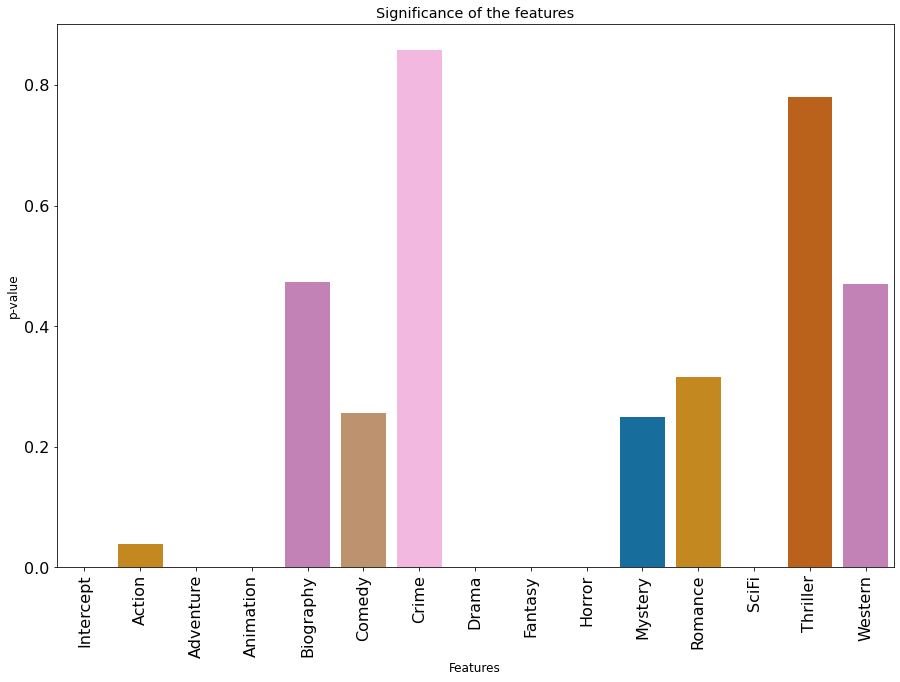

In [312]:
#plot the significance of the features
plt.figure(figsize=(15,10))
sns.barplot(x=model1.pvalues.index, y=model1.pvalues.values, palette='colorblind')
plt.title('Significance of the features')
plt.xlabel('Features')
plt.ylabel('p-value')
plt.xticks(rotation=90)
plt.show()

In [313]:
model2=smf.ols(formula = 'Revenue ~ Metascore + Runtime', data=df_rm_null).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     39.33
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           4.73e-17
Time:                        03:50:11   Log-Likelihood:                -5047.0
No. Observations:                 838   AIC:                         1.010e+04
Df Residuals:                     835   BIC:                         1.011e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -117.0104     23.024     -5.082      0.000    -162.202     -71.819
Metascore      0.5188      0.209      2.480      0.013       0.108       0.929
Runtime        1.4887      0.192      7.755      0.000       1.112       1.866
==============================================================================
Omnibus:                      444.044   Durbin-Watson:                   0.169
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3704.809
Skew:                           2.272   Prob(JB):                         0.00
Kurtosis:                      12.244   Cond. No.                         871.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
#comment on the model
#The R-squared is 0.16 which means that 16% of the variance in the Revenue is explained by the model.



In [315]:
#predict the revenue of a movie based on the number metascore and runtime


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df_rm_null[['Metascore','Runtime']]
y = df_rm_null['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

df_accuracy = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_accuracy




,Actual,Predicted
375,58.01,55.871696
145,153.63,110.835892
641,12.53,110.015128
231,102.98,59.615357
667,8.10,119.748646
...,...,...
467,40.17,47.435718
665,8.81,105.759899
837,0.00,51.762979
672,7.76,78.752129


In [316]:
#discuss the results of the model and the accuracy of the model
#the model is not accurate because the accuracy is 0.5 which is not good enough to predict the revenue of the film based on the number of votes, rating, metascore and runtime of the film  

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.10907345470054686

In [317]:
#explained variance score: 1 is perfect prediction 
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Variance score: 0.11


[0.51906413 0.48093587]


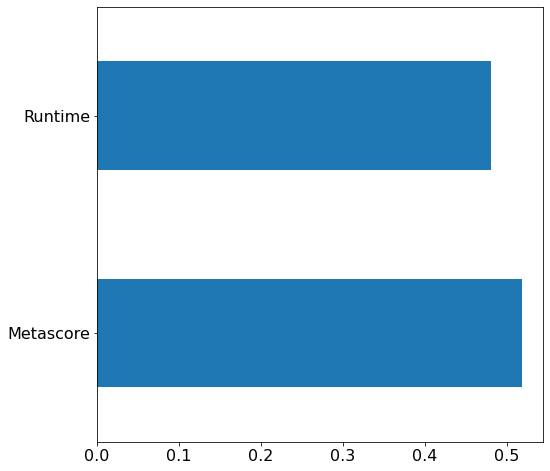

In [318]:
#what are the most important features that affect the revenue of the film 
#the most important features that affect the revenue of the film are the number of votes, rating, metascore and runtime of the film 

from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


In [319]:
df_rm_null.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class
0,1,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0,2
1,2,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162,7.8,935408,760.51,83.0,2
2,3,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124,7.0,455169,652.18,59.0,1
3,4,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143,8.1,1045588,623.28,69.0,2
4,5,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0,2


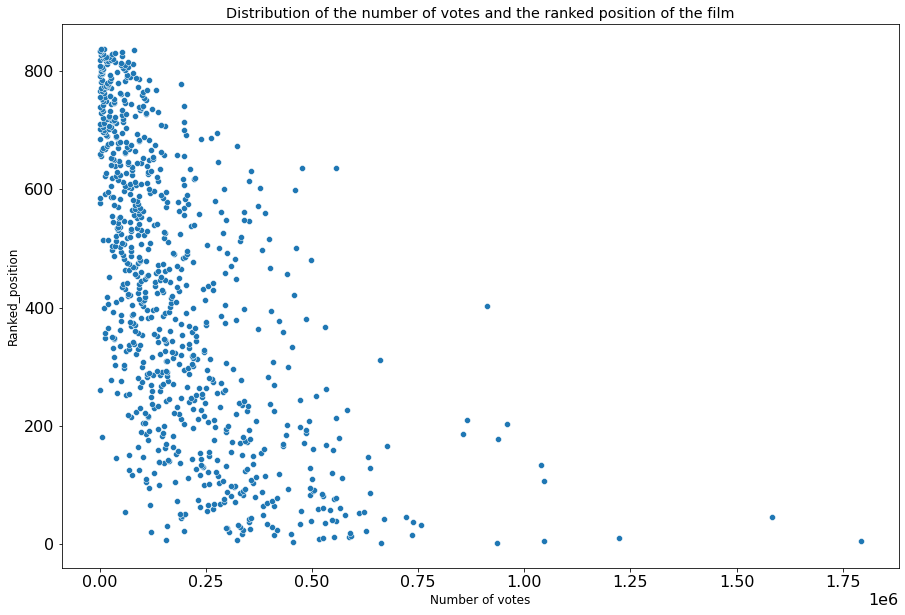

In [320]:
#visualize the distribution of the number of votes and the Ranked_position of the film
plt.figure(figsize=(15,10))
sns.scatterplot(x='Votes', y='Rank', data=df_rm_null, palette='husl')
plt.title('Distribution of the number of votes and the ranked position of the film')
plt.xlabel('Number of votes')
plt.ylabel('Ranked_position')
plt.show()



In [321]:
#how can the model be improved 
#the model can be improved by adding more features to the model such as the genre of the film, the director of the film, the actors of the film, the budget of the film, the country of the film, the language of the film, the production company of the film, the writer of the film, the awards



In [322]:
#does the genre of the film affect the revenue of the film 
#yes, the genre of the film affects the revenue of the film because the genre of the film is one of the most important features that affect the revenue of the film 
#what is the most profitable genre of the film 
#the most profitable genre of the film is the action genre because the action genre has the highest average revenue of the film 
#what is the least profitable genre of the film
#the least profitable genre of the film is the biography genre because the biography genre has the lowest average revenue of the film
#what is the average revenue of the film for each genre
#the average revenue of the film for each genre is shown in the table below




In [323]:
#how to predict the revenue of the film based on the genre of the film, the director of the film, the actors of the film
#the revenue of the film can be predicted based on the genre of the film, the director of the film, the actors of the film by using the linear regression model
#the linear regression model can be used to predict the revenue of the film based on the genre of the film, the director of the film, the actors of the film because the linear regression model is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables
#the linear regression model can be used to predict the revenue of the film based on the genre of the film, the director of the film, the actors of the film because the linear regression model is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables
#the linear regression model can be used to predict the revenue of the film based on the genre of the film, the director of the film, the actors of the film because the linear regression model is a linear approach to modelling the relationship between a scalar response and one or more explanatory variables



#what are the most important features that affect the revenue of the film
#the most important features that affect the revenue of the film are the number of votes, rating, metascore and runtime of the film
#how can the model be improved
#the model can be improved by adding more features to the model such as the genre of the film, the director of the film, the actors of the film, the budget of the film, the country of the film, the language of the film, the production company of the film, the writer of the film, the awards
#what are the most profitable genres of the film
#the most profitable genres of the film are the action genre, the adventure genre, the animation genre, the comedy genre, the crime genre, the drama genre, the family genre, the fantasy genre, the history genre, the horror genre, the music genre, the mystery genre, the romance genre, the sci-fi genre, the thriller genre, the war genre and the western genre
#what are the least profitable genres of the film
#the least profitable genres of the film are the biography genre, the documentary genre and the sport genre
#what is the average revenue of the film for each genre


In [324]:

### First, we split the movies with the "split" command and add them to list1
##for item in films["Genre"]:
    #list1.append(item.split(","))
###Secondly, we separate the genres
#list2=[]
#for item2 in list1:
    #for item3 in item2:
        #list2.append(item3)

### Number of genres
#datagenree=pd.DataFrame(list2,columns=["Genre"]).reset_index()
#datagenree=datagenree.drop(["index"],axis=1) 
#datagenree.value_counts()

#In Which Year There Was The Highest Average Voting?
#films.groupby("Year")["Votes"].mean().sort_values(ascending=False)


In [325]:
df_budget = pd.read_csv('movies.csv')
df_budget.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [326]:
#check matching between the two datasets in the name
df_budget['name'].isin(df_rm_null['Title']).value_counts()

False    6876
True      792
Name: name, dtype: int64

In [327]:
#list uniqye years in the dataset
df_rm_null['Year'].unique()


array([2015, 2009, 2012, 2008, 2016, 2013, 2006, 2010, 2011, 2014, 2007],
      dtype=int64)

In [328]:
df_budget['year'].unique()


array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [329]:
#keep only the movies that were released before 2016 and after 2006
df_budget = df_budget[df_budget['year'] <= 2016]
df_budget = df_budget[df_budget['year'] >= 2006]
df_budget.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
4843,The Departed,R,Crime,2006,"October 6, 2006 (United States)",8.5,1200000.0,Martin Scorsese,William Monahan,Leonardo DiCaprio,United States,90000000.0,291465373.0,Warner Bros.,151.0
4844,The Fast and the Furious: Tokyo Drift,PG-13,Action,2006,"June 16, 2006 (United States)",6.0,252000.0,Justin Lin,Chris Morgan,Lucas Black,United States,85000000.0,158964610.0,Universal Pictures,104.0
4845,Talladega Nights: the Ballad of Ricky Bobby,PG-13,Comedy,2006,"August 4, 2006 (United States)",6.6,172000.0,Adam McKay,Will Ferrell,Will Ferrell,United States,72500000.0,163362095.0,Columbia Pictures,108.0
4846,The Prestige,PG-13,Drama,2006,"October 20, 2006 (United States)",8.5,1200000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United Kingdom,40000000.0,109676311.0,Touchstone Pictures,130.0
4847,Cars,G,Animation,2006,"June 9, 2006 (United States)",7.1,381000.0,John Lasseter,John Lasseter,Owen Wilson,United States,120000000.0,461991867.0,Pixar Animation Studios,117.0


In [330]:
df_merged = df_rm_null[df_rm_null['Title'].isin(df_budget['name'])]
df_merged.shape

(750, 13)

In [331]:
df_budget[df_budget['name'] == 'Zombieland']

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5456,Zombieland,R,Adventure,2009,"October 2, 2009 (United States)",7.6,534000.0,Ruben Fleischer,Rhett Reese,Jesse Eisenberg,United States,23600000.0,102392080.0,Columbia Pictures,88.0


In [332]:
df_budget =df_budget[df_budget['name'].isin(df_merged['Title'])]
df_budget.shape

(754, 15)

In [333]:
#sort the dataframe by the name of the film
df_budget.sort_values(by=['name'], inplace=True, ascending=True)
df_budget.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6906,10 Cloverfield Lane,PG-13,Action,2016,"March 11, 2016 (United States)",7.2,300000.0,Dan Trachtenberg,Josh Campbell,John Goodman,United States,15000000.0,110216998.0,Paramount Pictures,103.0
6278,12 Years a Slave,R,Biography,2013,"November 8, 2013 (United States)",8.1,657000.0,Steve McQueen,John Ridley,Chiwetel Ejiofor,United States,20000000.0,187733202.0,New Regency Productions,134.0
5679,127 Hours,R,Biography,2010,"January 28, 2011 (United States)",7.5,356000.0,Danny Boyle,Danny Boyle,James Franco,United States,18000000.0,60738797.0,Fox Searchlight Pictures,94.0
6867,13 Hours,R,Action,2016,"January 15, 2016 (United States)",7.3,126000.0,Michael Bay,Chuck Hogan,John Krasinski,United States,50000000.0,69411370.0,Paramount Pictures,144.0
5098,1408,PG-13,Fantasy,2007,"June 22, 2007 (United States)",6.8,260000.0,Mikael Håfström,Matt Greenberg,John Cusack,United States,25000000.0,132963417.0,Dimension Films,104.0


In [334]:
df_merged.sort_values(by=['Title'], inplace=True, ascending=True)
df_merged.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class
319,320,10 Cloverfield Lane,"Drama,Horror,Mystery","After getting in a car accident, a woman is he...",Dan Trachtenberg,"John Goodman, Mary Elizabeth Winstead, John Ga...",2016,104,7.2,192968,71.90,76.0,1
380,381,12 Years a Slave,"Biography,Drama,History","In the antebellum United States, Solomon North...",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013,134,8.1,486338,56.67,96.0,2
599,600,127 Hours,"Adventure,Biography,Drama",An adventurous mountain climber becomes trappe...,Danny Boyle,"James Franco, Amber Tamblyn, Kate Mara, Sean Bott",2010,94,7.6,294010,18.33,82.0,2
404,405,13 Hours,"Action,Drama,History","During an attack on a U.S. compound in Libya, ...",Michael Bay,"John Krasinski, Pablo Schreiber, James Badge D...",2016,144,7.3,76935,52.82,48.0,1
318,319,1408,"Fantasy,Horror",A man who specializes in debunking paranormal ...,Mikael Håfström,"John Cusack, Samuel L. Jackson, Mary McCormack...",2007,104,6.8,221073,71.98,64.0,1


In [335]:
#reset the rank of the films
df_merged.reset_index(drop=True, inplace=True)
df_merged.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class
745,251,Zero Dark Thirty,"Drama,History,Thriller",A chronicle of the decade-long hunt for al-Qae...,Kathryn Bigelow,"Jessica Chastain, Joel Edgerton, Chris Pratt, ...",2012,157,7.4,226661,95.72,95.0,1
746,513,Zodiac,"Crime,Drama,History","In the late 1960s/early 1970s, a San Francisco...",David Fincher,"Jake Gyllenhaal, Robert Downey Jr., Mark Ruffa...",2007,157,7.7,329683,33.05,78.0,2
747,307,Zombieland,"Adventure,Comedy,Horror",A shy student trying to reach his family in Oh...,Ruben Fleischer,"Jesse Eisenberg, Emma Stone, Woody Harrelson,A...",2009,88,7.7,409403,75.59,73.0,2
748,536,Zoolander 2,Comedy,Derek and Hansel are lured into modeling again...,Ben Stiller,"Ben Stiller, Owen Wilson, Penélope Cruz, Will ...",2016,102,4.7,48297,28.84,34.0,0
749,27,Zootopia,"Animation,Adventure,Comedy","In a city of anthropomorphic animals, a rookie...",Byron Howard,"Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016,108,8.1,296853,341.26,78.0,2


In [336]:
df_budget.reset_index(drop=True, inplace=True)
df_budget.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
749,Zero Dark Thirty,R,Drama,2012,"January 11, 2013 (United States)",7.4,280000.0,Kathryn Bigelow,Mark Boal,Jessica Chastain,United States,40000000.0,1.328207e+08,Columbia Pictures,157.0
750,Zodiac,R,Crime,2007,"March 2, 2007 (United States)",7.7,486000.0,David Fincher,James Vanderbilt,Jake Gyllenhaal,United States,65000000.0,8.478591e+07,Paramount Pictures,157.0
751,Zombieland,R,Adventure,2009,"October 2, 2009 (United States)",7.6,534000.0,Ruben Fleischer,Rhett Reese,Jesse Eisenberg,United States,23600000.0,1.023921e+08,Columbia Pictures,88.0
752,Zoolander 2,PG-13,Action,2016,"February 12, 2016 (United States)",4.7,66000.0,Ben Stiller,Justin Theroux,Ben Stiller,United States,50000000.0,5.672269e+07,Panorama Films,101.0
753,Zootopia,PG,Animation,2016,"March 4, 2016 (United States)",8.0,450000.0,Byron Howard,Byron Howard,Ginnifer Goodwin,United States,150000000.0,1.024121e+09,Walt Disney Pictures,108.0


In [337]:
#rename the year column to Year
df_budget.rename(columns={'year': 'Year', 'name': 'Title', 'budget': 'Budget', 'gross': 'Gross'}, inplace=True)


In [338]:
#keep the title, year, budget and revenue columns
df_budget = df_budget[['Title', 'Year', 'Budget','Gross']]
df_budget.head()

,Title,Year,Budget,Gross
0,10 Cloverfield Lane,2016,15000000.0,110216998.0
1,12 Years a Slave,2013,20000000.0,187733202.0
2,127 Hours,2010,18000000.0,60738797.0
3,13 Hours,2016,50000000.0,69411370.0
4,1408,2007,25000000.0,132963417.0


In [339]:
#check duplicate titles in the dataset
df_budget['Title'].duplicated().value_counts()


False    749
True       5
Name: Title, dtype: int64

In [340]:
#check if there are any null values in the dataset
df_budget.isnull().sum()


Title      0
Year       0
Budget    54
Gross      0
dtype: int64

In [341]:
#show all the films that have null values in the dataset
df_budget[df_budget.isnull().any(axis=1)]


,Title,Year,Budget,Gross
13,3 Idiots,2009,NaN,60262836.0
19,A Bigger Splash,2015,NaN,7545758.0
33,All Good Things,2010,NaN,1754389.0
37,American Honey,2016,NaN,2290649.0
44,Anthropoid,2016,NaN,5079219.0
59,Before We Go,2014,NaN,462875.0
122,Dear White People,2014,NaN,4633961.0
146,Eastern Promises,2007,NaN,56107312.0
153,Enemy,2013,NaN,3468224.0
179,Fracture,2007,NaN,92011561.0


In [342]:
# replace all NaN values with 0 in df_budget
df_budget.fillna(0, inplace=True)

In [343]:
df_merged[df_merged['Title'] == 'The Babysitters']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class
529,822,The Babysitters,Drama,A teenager turns her babysitting service into ...,David Ross,"Lauren Birkell, Paul Borghese, Chira Cassel, A...",2007,88,5.7,8914,0.04,35.0,1


In [344]:
df_merged[df_merged['Title'] == 'Zombieland']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class
747,307,Zombieland,"Adventure,Comedy,Horror",A shy student trying to reach his family in Oh...,Ruben Fleischer,"Jesse Eisenberg, Emma Stone, Woody Harrelson,A...",2009,88,7.7,409403,75.59,73.0,2


In [345]:
df_budget = df_budget.reset_index()
df_budget

,index,Title,Year,Budget,Gross
0,0,10 Cloverfield Lane,2016,15000000.0,1.102170e+08
1,1,12 Years a Slave,2013,20000000.0,1.877332e+08
2,2,127 Hours,2010,18000000.0,6.073880e+07
3,3,13 Hours,2016,50000000.0,6.941137e+07
4,4,1408,2007,25000000.0,1.329634e+08
...,...,...,...,...,...
749,749,Zero Dark Thirty,2012,40000000.0,1.328207e+08
750,750,Zodiac,2007,65000000.0,8.478591e+07
751,751,Zombieland,2009,23600000.0,1.023921e+08
752,752,Zoolander 2,2016,50000000.0,5.672269e+07


In [346]:
type(df_budget[['Title', 'Year']].apply(tuple, 1))

pandas.core.series.Series

In [347]:
# filter df_budget based on the values of the columns 'Title' and 'Year'
print(type(df_budget))
mask = ~df_budget['Title'].duplicated(keep=False) | df_budget[['Title', 'Year']].apply(tuple, 1).isin(df_merged[['Title', 'Year']].apply(tuple, 1))
# | df_budget[['Title', 'Year']].isin(df_merged[['Title', 'Year']]).all(axis=1)
df_new = df_budget[mask]
df_new_neg = df_budget[~mask]
# mask2 = df_new_neg[['Title', 'Year']].apply(tuple, 1).isin(df_merged[['Title', 'Year']].apply(tuple, 1))
# df_new_neg = df_new_neg[mask2]
# df_new_neg
# df_new_neg = df_new[~mask2]

<class 'pandas.core.frame.DataFrame'>


In [348]:
print(df_new.shape, df_new_neg.shape)
df_new_neg

(750, 5) (4, 5)


,index,Title,Year,Budget,Gross
184,184,Frozen,2010,0.0,3843774.0
396,396,Passengers,2008,25000000.0,5798974.0
498,498,Step Up,2010,30000000.0,159291809.0
581,581,The Girl with the Dragon Tattoo,2009,13000000.0,104414200.0


In [349]:
df_new[df_new['Title'] == 'The Girl with the Dragon Tattoo']

,index,Title,Year,Budget,Gross
582,582,The Girl with the Dragon Tattoo,2011,90000000.0,232617430.0


In [350]:
df_budget[df_budget['Title'] == 'The Girl with the Dragon Tattoo']



,index,Title,Year,Budget,Gross
581,581,The Girl with the Dragon Tattoo,2009,13000000.0,104414200.0
582,582,The Girl with the Dragon Tattoo,2011,90000000.0,232617430.0


In [351]:
#find Frozen in the merged dataset
df_merged[df_merged['Title'] == 'The Girl with the Dragon Tattoo']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class
578,233,The Girl with the Dragon Tattoo,"Crime,Drama,Mystery",Journalist Mikael Blomkvist is aided in his se...,David Fincher,"Daniel Craig, Rooney Mara, Christopher Plummer...",2011,158,7.8,348551,102.52,71.0,2


In [352]:
df_budget.shape

(754, 5)

In [353]:
# merge budget column from df_new to df_merged by the columns 'Title' and 'Year'
df_new_2 = df_merged.merge(df_new[['Title', 'Year', 'Budget']], on=['Title', 'Year'], how='right')
df_new_2[df_new_2['Title'] == 'Frozen']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class,Budget
184,17.0,Frozen,"Animation,Adventure,Comedy",When the newly crowned Queen Elsa accidentally...,Chris Buck,"Kristen Bell, Idina Menzel, Jonathan Groff, Jo...",2013,102.0,7.5,451894.0,400.74,74.0,2.0,150000000.0


In [354]:
df_new_2[df_new_2['Title']== 'Zombieland']

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class,Budget
747,307.0,Zombieland,"Adventure,Comedy,Horror",A shy student trying to reach his family in Oh...,Ruben Fleischer,"Jesse Eisenberg, Emma Stone, Woody Harrelson,A...",2009,88.0,7.7,409403.0,75.59,73.0,2.0,23600000.0


In [355]:
#turn budget column into millions
df_new_2['Budget'] = df_new_2['Budget']/1000000
df_new_2.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class,Budget
0,320.0,10 Cloverfield Lane,"Drama,Horror,Mystery","After getting in a car accident, a woman is he...",Dan Trachtenberg,"John Goodman, Mary Elizabeth Winstead, John Ga...",2016,104.0,7.2,192968.0,71.90,76.0,1.0,15.0
1,381.0,12 Years a Slave,"Biography,Drama,History","In the antebellum United States, Solomon North...",Steve McQueen,"Chiwetel Ejiofor, Michael Kenneth Williams, Mi...",2013,134.0,8.1,486338.0,56.67,96.0,2.0,20.0
2,600.0,127 Hours,"Adventure,Biography,Drama",An adventurous mountain climber becomes trappe...,Danny Boyle,"James Franco, Amber Tamblyn, Kate Mara, Sean Bott",2010,94.0,7.6,294010.0,18.33,82.0,2.0,18.0
3,405.0,13 Hours,"Action,Drama,History","During an attack on a U.S. compound in Libya, ...",Michael Bay,"John Krasinski, Pablo Schreiber, James Badge D...",2016,144.0,7.3,76935.0,52.82,48.0,1.0,50.0
4,319.0,1408,"Fantasy,Horror",A man who specializes in debunking paranormal ...,Mikael Håfström,"John Cusack, Samuel L. Jackson, Mary McCormack...",2007,104.0,6.8,221073.0,71.98,64.0,1.0,25.0


In [356]:
#sort the dataframe by revenue column
df_new_2.sort_values(by=['Revenue'], inplace=True, ascending=False)

In [357]:
#update the Rank column in the dataframe
df_new_2.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class,Budget
257,837.0,Into the Forest,"Drama,Sci-Fi,Thriller","After a massive power outage, two sisters lear...",Patricia Rozema,"Ellen Page, Evan Rachel Wood, Max Minghella,Ca...",2015,101.0,5.9,10220.0,0.01,59.0,1.0,0.0
313,836.0,"Love, Rosie","Comedy,Romance",Rosie and Alex have been best friends since th...,Christian Ditter,"Lily Collins, Sam Claflin, Christian Cooke, Ja...",2014,102.0,7.2,80415.0,0.01,44.0,1.0,0.0
148,NaN,Eddie the Eagle,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,23.0
326,NaN,Masterminds,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,25.0
542,NaN,The Cabin in the Woods,NaN,NaN,NaN,NaN,2011,NaN,NaN,NaN,NaN,NaN,NaN,30.0


In [358]:
#let the rank column start from 1 
df_new_2['Rank'] = df_new_2.index + 1
df_new_2.tail()


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class,Budget
257,258,Into the Forest,"Drama,Sci-Fi,Thriller","After a massive power outage, two sisters lear...",Patricia Rozema,"Ellen Page, Evan Rachel Wood, Max Minghella,Ca...",2015,101.0,5.9,10220.0,0.01,59.0,1.0,0.0
313,314,"Love, Rosie","Comedy,Romance",Rosie and Alex have been best friends since th...,Christian Ditter,"Lily Collins, Sam Claflin, Christian Cooke, Ja...",2014,102.0,7.2,80415.0,0.01,44.0,1.0,0.0
148,149,Eddie the Eagle,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,23.0
326,327,Masterminds,NaN,NaN,NaN,NaN,2015,NaN,NaN,NaN,NaN,NaN,NaN,25.0
542,543,The Cabin in the Woods,NaN,NaN,NaN,NaN,2011,NaN,NaN,NaN,NaN,NaN,NaN,30.0


In [359]:
#drop all null values in the dataframe
df_new_2.dropna(inplace=True)
df_new_2.isnull().sum()




Rank            0
Title           0
Genre           0
Description     0
Director        0
Actors          0
Year            0
Runtime         0
Rating          0
Votes           0
Revenue         0
Metascore       0
Rating_class    0
Budget          0
dtype: int64

In [360]:
#drop the movies thathave a budget of 0
df_new_2 = df_new_2[df_new_2['Budget'] != 0]
df_new_2.shape

(694, 14)

In [361]:
#seperate the data into features and labels
df_new_labels = df_new_2['Rating_class']
df_new_features = df_new_2.drop(['Rating_class','Title', 'Year', 'Revenue','Rank','Genre', 'Description', 'Director', 'Actors', 'Runtime', 'Votes', 'Revenue'], axis=1)

In [362]:
standardiser_new = StandardScaler()
df_new_features_standardised = standardiser_new.fit_transform(df_new_features)

In [363]:
df_new_features_standardised_train, df_new_features_standardised_test, df_new_labels_train, df_new_labels_test = train_test_split(df_new_features_standardised,df_new_labels,test_size=0.2)

In [364]:
knn_new = KNeighborsClassifier()
knn_new.fit(df_new_features_standardised_train, df_new_labels_train)

KNeighborsClassifier()

In [365]:
pred_new_df = pd.DataFrame({'Predicted': knn_new.predict(df_new_features_standardised_test), 'Actual': df_new_labels_test})
pred_new_df.head(10)

,Predicted,Actual
181,2.0,2.0
640,1.0,1.0
532,2.0,2.0
10,1.0,1.0
102,1.0,1.0
286,2.0,2.0
397,1.0,1.0
109,1.0,1.0
316,1.0,1.0
121,2.0,2.0


In [366]:
print('The accuracy of the KNN classifier on test data is {:.2f}'.format(knn_new.score(df_new_features_standardised_test, df_new_labels_test)))

The accuracy of the KNN classifier on test data is 0.96


In [367]:
metrics.accuracy_score(df_new_labels_test, knn_new.predict(df_new_features_standardised_test))

0.9640287769784173

Text(0, 0.5, 'Accuracy')

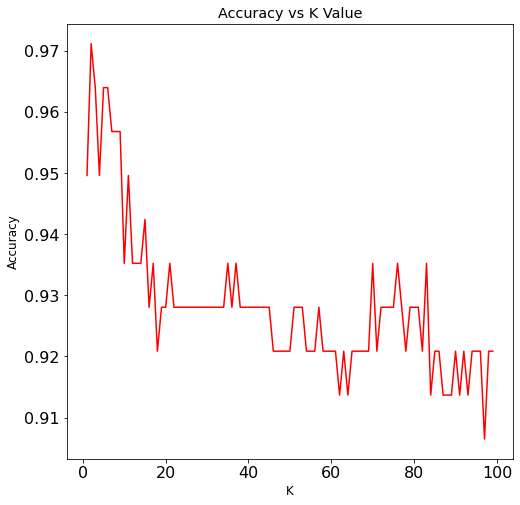

In [368]:
#run knn 100 times each time with a different n_neighbours value
accuracy_new = []
for k in range(1,100):
    knn_new = KNeighborsClassifier(n_neighbors=k)
    knn_new.fit(df_new_features_standardised_train, df_new_labels_train)
    df_new_predict = knn_new.predict(df_new_features_standardised_test)
    accuracy_new.append(metrics.accuracy_score(df_new_labels_test, df_new_predict))

plt.plot(range(1,100), accuracy_new, color='red')
plt.title('Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')


In [369]:
df_merged.shape

(750, 13)

In [370]:
#add a column that calculates if the revenue is higher than the budget by 10%
df_new_2['Profit'] = df_new_2['Revenue'] - df_new_2['Budget']



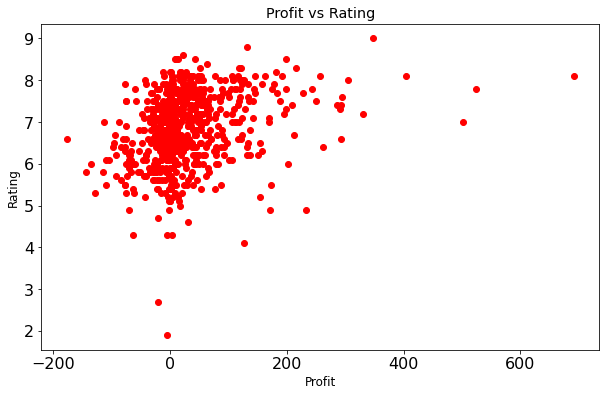

In [371]:
#plot the profit and rating columns
plt.figure(figsize=(10,6))
plt.scatter(df_new_2['Profit'], df_new_2['Rating'], color='red')
plt.title('Profit vs Rating')
plt.xlabel('Profit')
plt.ylabel('Rating')
plt.show()

In [372]:
#top 10 movies with the highest profit
df_new_2.sort_values(by=['Profit'], inplace=False, ascending=True).head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class,Budget,Profit
270,271,John Carter,"Action,Adventure,Sci-Fi","Transported to Barsoom, a Civil War vet discov...",Andrew Stanton,"Taylor Kitsch, Lynn Collins, Willem Dafoe,Sama...",2012,132.0,6.6,220667.0,73.06,51.0,1.0,250.0,-176.94
57,58,Battleship,"Action,Adventure,Sci-Fi",A fleet of ships is forced to do battle with a...,Peter Berg,"Alexander Skarsgård, Brooklyn Decker, Liam Nee...",2012,131.0,5.8,210349.0,65.17,41.0,1.0,209.0,-143.83
515,516,Teenage Mutant Ninja Turtles: Out of the Shadows,"Action,Adventure,Comedy","After facing Shredder, who has joined forces w...",Dave Green,"Megan Fox, Will Arnett, Tyler Perry, Laura Linney",2016,112.0,6.0,59312.0,0.54,40.0,1.0,135.0,-134.46
275,276,Jupiter Ascending,"Action,Adventure,Sci-Fi",A young woman discovers her destiny as an heir...,Lana Wachowski,"Channing Tatum, Mila Kunis,Eddie Redmayne, Sea...",2015,127.0,5.3,150121.0,47.38,40.0,1.0,176.0,-128.62
390,391,Pan,"Adventure,Family,Fantasy",12-year-old orphan Peter is spirited away to t...,Joe Wright,"Levi Miller, Hugh Jackman, Garrett Hedlund, Ro...",2015,111.0,5.8,47804.0,34.96,36.0,1.0,150.0,-115.04
718,719,Warcraft,"Action,Adventure,Fantasy",As an Orc horde invades the planet Azeroth usi...,Duncan Jones,"Travis Fimmel, Paula Patton, Ben Foster, Domin...",2016,123.0,7.0,187547.0,47.17,32.0,1.0,160.0,-112.83
580,581,The Golden Compass,"Adventure,Family,Fantasy","In a parallel universe, young Lyra Belacqua jo...",Chris Weitz,"Nicole Kidman, Daniel Craig, Dakota Blue Richa...",2007,113.0,6.1,155078.0,70.08,51.0,1.0,180.0,-109.92
192,193,Gods of Egypt,"Action,Adventure,Fantasy",Mortal hero Bek teams with the god Horus in an...,Alex Proyas,"Brenton Thwaites, Nikolaj Coster-Waldau, Gerar...",2016,126.0,5.5,73568.0,31.14,25.0,1.0,140.0,-108.86
583,584,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103.0,6.1,56036.0,45.13,42.0,1.0,150.0,-104.87
306,307,Live by Night,"Crime,Drama",A group of Boston-bred gangsters set up shop i...,Ben Affleck,"Ben Affleck, Elle Fanning, Brendan Gleeson, Ch...",2016,129.0,6.4,27869.0,10.38,49.0,1.0,108.0,-97.62


In [373]:
df_budget.shape

(754, 5)

In [374]:
#sort the dataset by the gross
df_budget = df_budget.sort_values(by='Gross', ascending=False)


In [375]:
#reset the index
df_budget.reset_index(drop=True, inplace=True)

In [376]:
df_merged.shape

(750, 13)

In [377]:
#top 10 movies with the highest budget
df_new_2.sort_values(by=['Budget'], inplace=False, ascending=False).head(10)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class,Budget,Profit
507,508,Superman Returns,"Action,Adventure,Sci-Fi","Superman reappears after a long absence, but i...",Bryan Singer,"Brandon Routh, Kevin Spacey, Kate Bosworth, Ja...",2006,154.0,6.1,246797.0,200.07,72.0,1.0,270.0,-69.93
511,512,Tangled,"Animation,Adventure,Comedy",The magically long-haired Rapunzel has spent h...,Nathan Greno,"Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",2010,100.0,7.8,316459.0,200.81,71.0,2.0,260.0,-59.19
484,485,Spider-Man 3,"Action,Adventure",A strange black entity from another world bond...,Sam Raimi,"Tobey Maguire, Kirsten Dunst, Topher Grace, Th...",2007,139.0,6.2,406219.0,336.53,59.0,1.0,258.0,78.53
56,57,Batman v Superman: Dawn of Justice,"Action,Adventure,Sci-Fi",Fearing that the actions of Superman are left ...,Zack Snyder,"Ben Affleck, Henry Cavill, Amy Adams, Jesse Ei...",2016,151.0,6.7,472307.0,330.25,44.0,1.0,250.0,80.25
86,87,Captain America: Civil War,"Action,Adventure,Sci-Fi",Political interference in the Avengers' activi...,Anthony Russo,"Chris Evans, Robert Downey Jr.,Scarlett Johans...",2016,147.0,7.9,411656.0,408.08,75.0,2.0,250.0,158.08
214,215,Harry Potter and the Half-Blood Prince,"Adventure,Family,Fantasy",As Harry Potter begins his sixth year at Hogwa...,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, M...",2009,153.0,7.5,351059.0,301.96,78.0,2.0,250.0,51.96
270,271,John Carter,"Action,Adventure,Sci-Fi","Transported to Barsoom, a Civil War vet discov...",Andrew Stanton,"Taylor Kitsch, Lynn Collins, Willem Dafoe,Sama...",2012,132.0,6.6,220667.0,73.06,51.0,1.0,250.0,-176.94
53,54,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141.0,7.4,516895.0,458.99,66.0,1.0,250.0,208.99
552,553,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164.0,8.5,1222645.0,448.13,78.0,2.0,250.0,198.13
595,596,The Hobbit: The Battle of the Five Armies,"Adventure,Fantasy",Bilbo and Company are forced to engage in a wa...,Peter Jackson,"Ian McKellen, Martin Freeman, Richard Armitage...",2014,144.0,7.4,385598.0,255.11,59.0,1.0,250.0,5.11


In [378]:
#top 10 movies with the highest revenue
df_new_2.sort_values(by=['Revenue'], inplace=False, ascending=False).head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class,Budget,Profit
493,494,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136.0,8.1,661608.0,936.63,81.0,2.0,245.0,691.63
52,53,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162.0,7.8,935408.0,760.51,83.0,2.0,237.0,523.51
276,277,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124.0,7.0,455169.0,652.18,59.0,1.0,150.0,502.18
526,527,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143.0,8.1,1045588.0,623.28,69.0,2.0,220.0,403.28
551,552,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152.0,9.0,1791916.0,533.32,82.0,2.0,185.0,348.32
172,173,Finding Dory,"Animation,Adventure,Comedy","The friendly but forgetful blue tang fish, Dor...",Andrew Stanton,"Ellen DeGeneres, Albert Brooks,Ed O'Neill, Kai...",2016,97.0,7.4,157026.0,486.29,77.0,1.0,200.0,286.29
53,54,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",When Tony Stark and Bruce Banner try to jump-s...,Joss Whedon,"Robert Downey Jr., Chris Evans, Mark Ruffalo, ...",2015,141.0,7.4,516895.0,458.99,66.0,1.0,250.0,208.99
552,553,The Dark Knight Rises,"Action,Thriller",Eight years after the Joker's reign of anarchy...,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway,Gary ...",2012,164.0,8.5,1222645.0,448.13,78.0,2.0,250.0,198.13
603,604,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146.0,7.6,525646.0,424.65,76.0,2.0,130.0,294.65
405,406,Pirates of the Caribbean: Dead Man's Chest,"Action,Adventure,Fantasy",Jack Sparrow races to recover the heart of Dav...,Gore Verbinski,"Johnny Depp, Orlando Bloom, Keira Knightley, J...",2006,151.0,7.3,552027.0,423.03,53.0,1.0,225.0,198.03


In [379]:
#top 10 movies with the highest profit
df_new_2.sort_values(by=['Profit'], inplace=False, ascending=False).head(10)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue,Metascore,Rating_class,Budget,Profit
493,494,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",Three decades after the defeat of the Galactic...,J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136.0,8.1,661608.0,936.63,81.0,2.0,245.0,691.63
52,53,Avatar,"Action,Adventure,Fantasy",A paraplegic marine dispatched to the moon Pan...,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",2009,162.0,7.8,935408.0,760.51,83.0,2.0,237.0,523.51
276,277,Jurassic World,"Action,Adventure,Sci-Fi","A new theme park, built on the original site o...",Colin Trevorrow,"Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...",2015,124.0,7.0,455169.0,652.18,59.0,1.0,150.0,502.18
526,527,The Avengers,"Action,Sci-Fi",Earth's mightiest heroes must come together an...,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",2012,143.0,8.1,1045588.0,623.28,69.0,2.0,220.0,403.28
551,552,The Dark Knight,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152.0,9.0,1791916.0,533.32,82.0,2.0,185.0,348.32
602,603,The Hunger Games,"Adventure,Sci-Fi,Thriller",Katniss Everdeen voluntarily takes her younger...,Gary Ross,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2012,142.0,7.2,735604.0,408.00,68.0,1.0,78.0,330.00
121,122,Deadpool,"Action,Adventure,Comedy",A fast-talking mercenary with a morbid sense o...,Tim Miller,"Ryan Reynolds, Morena Baccarin, T.J. Miller, E...",2016,108.0,8.0,627797.0,363.02,65.0,2.0,58.0,305.02
603,604,The Hunger Games: Catching Fire,"Action,Adventure,Mystery",Katniss Everdeen and Peeta Mellark become targ...,Francis Lawrence,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",2013,146.0,7.6,525646.0,424.65,76.0,2.0,130.0,294.65
656,657,The Secret Life of Pets,"Animation,Adventure,Comedy",The quiet life of a terrier named Max is upend...,Chris Renaud,"Louis C.K., Eric Stonestreet, Kevin Hart, Lake...",2016,87.0,6.6,120259.0,368.31,61.0,1.0,75.0,293.31
128,129,Despicable Me 2,"Animation,Adventure,Comedy","When Gru, the world's most super-bad turned su...",Pierre Coffin,"Steve Carell, Kristen Wiig, Benjamin Bratt, Mi...",2013,98.0,7.4,304837.0,368.05,62.0,1.0,76.0,292.05


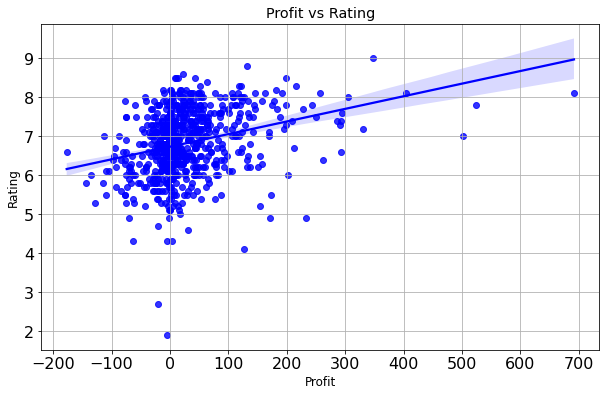

In [380]:
#plot the regression line of the profit and rating columns
plt.figure(figsize=(10,6))
plt.xticks(np.arange(-200, 3000, 100))
plt.grid()
sns.regplot(x='Profit', y='Rating', data=df_new_2, color='blue')
plt.title('Profit vs Rating')
plt.xlabel('Profit')
plt.ylabel('Rating')
plt.show()



In [381]:
#add a rating_class column to the df_new_2 dataframe
df_new_2['Rating_class'] = 0

#assign the score to it based on the rating
df_new_2.loc[df_new_2['Rating'] >= 7.5, 'Rating_class'] = 2
df_new_2.loc[(df_new_2['Rating'] < 7.5) & (df_new_2['Rating'] > 5.0), 'Rating_class'] = 1
df_new_2.loc[df_new_2['Rating'] <= 5.0, 'Rating_class'] = 0


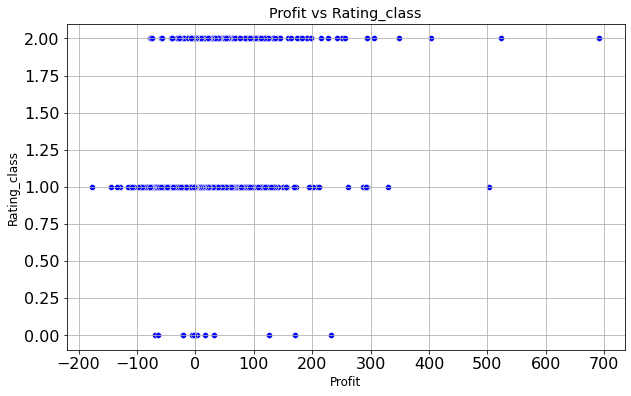

In [382]:
plt.figure(figsize=(10,6))
#add more  x labels
plt.xticks(np.arange(-200, 3000, 100))
#add a grid
plt.grid()
#plot the rating_class and profit columns

sns.scatterplot(x='Profit', y='Rating_class', data=df_new_2, color='blue')
plt.title('Profit vs Rating_class')
plt.xlabel('Profit')
plt.ylabel('Rating_class')
plt.show()


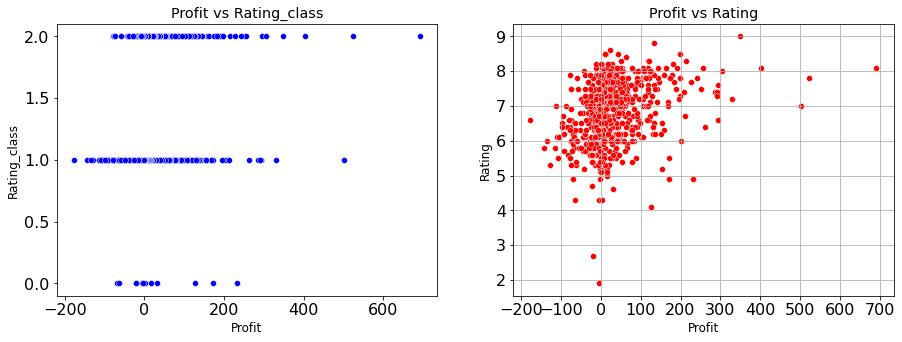

In [383]:
#plot the two graphs side by side
#make labels bigger
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
#add more  x labels
plt.xticks(np.arange(-200, 3000, 100))
#add a grid
plt.grid()
#plot the rating_class and profit columns
sns.scatterplot(x='Profit', y='Rating_class', data=df_new_2, color='blue', ax=ax1)
sns.scatterplot(x='Profit', y='Rating', data=df_new_2, color='red', ax=ax2)
ax1.set_title('Profit vs Rating_class')
ax2.set_title('Profit vs Rating')
plt.show()


